In [1]:
from __future__ import print_function
import cobra
import cobra.test
from os.path import join
cobra.DictList

#iRhto1108N_model with biomass as objective
iRhto1108N_model = cobra.io.read_sbml_model(join(r"C:\Users\helen\Desktop\spring2020\Rao lab\first paper\iRhto_memote-master", "iRhto.xml"))
iRhto1108N_model2 = cobra.io.read_sbml_model(join(r"C:\Users\helen\Desktop\spring2020\Rao lab\first paper\iRhto_memote-master", "iRhto.xml"))
iRhto1108N_model2.objective = "PDAGATpc_rm"

In [2]:
import pandas as pd 
import numpy as np
#import media information
#column 0 is name of exchange reaction, column 1 is upperbound in mM/h/gwd
YNBWAAAS = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPD.xlsx", 'rest of ynbwaaas 103', header = None)
YNBWAAAS = YNBWAAAS.to_numpy()
media_without_ynb = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPD.xlsx", 'media without ynb', header = None)
media_without_ynb = media_without_ynb.to_numpy()

print(YNBWAAAS)
print(media_without_ynb)
#initialize medium storage
test_medium = []


[['EX_so4_e' 0.217]
 ['EX_mg2_e' 0.868]
 ['EX_ca2_e' 0.104]
 ['EX_pi_e' 0.439]]
[['EX_glc__D_e' 4.63 4.63 4.63]
 ['EX_nh4_e' 4.75 0.238 0.159]
 ['EX_cl_e' 4.99 0.475 0.397]
 ['EX_na1_e' 2.26 2.26 2.26]
 ['EX_k_e' 6.27 6.27 6.27]]


In [4]:
#Original growth rate and TAG production rate
growth = 0
growth2 = 0
with iRhto1108N_model:
    medium = iRhto1108N_model.medium
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][1]
    iRhto1108N_model.medium = medium
    test_medium.append(medium.copy())
    growth = iRhto1108N_model.slim_optimize()
    
with iRhto1108N_model2:
    medium = test_medium[0]
    growth2 = iRhto1108N_model2.slim_optimize()
print(growth)
print(growth2)

0.3473565879315005
1.8912824552071394


In [6]:
#glucose and acetate
CN_5_a = np.zeros((2,100))
CN_100_a = np.zeros((2,100))
CN_150_a = np.zeros((2,100))

with iRhto1108N_model:
    medium = test_medium[0]
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model.medium = medium
        CN_5_a[0][k] = iRhto1108N_model.slim_optimize()

with iRhto1108N_model:
    medium = iRhto1108N_model.medium
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][2]
    test_medium.append(medium.copy())
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model.medium = medium
        CN_100_a[0][k] = iRhto1108N_model.slim_optimize()
        
with iRhto1108N_model:
    medium = iRhto1108N_model.medium
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][3]
    test_medium.append(medium.copy())
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model.medium = medium
        CN_150_a[0][k] = iRhto1108N_model.slim_optimize()

with iRhto1108N_model2:
    medium = test_medium[0]
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model2.medium = medium
        CN_5_a[1][k] = iRhto1108N_model2.slim_optimize()

with iRhto1108N_model2:
    medium = test_medium[1]
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model2.medium = medium
        CN_100_a[1][k] = iRhto1108N_model2.slim_optimize()
        
with iRhto1108N_model2:
    medium = test_medium[2]
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model2.medium = medium
        CN_150_a[1][k] = iRhto1108N_model2.slim_optimize()

CN_5_a

array([[0.34735659, 0.37017572, 0.39299485, 0.41581398, 0.43863311,
        0.46145224, 0.48427137, 0.5070905 , 0.52990964, 0.55272877,
        0.5755479 , 0.59836703, 0.62118616, 0.64400529, 0.66682442,
        0.68964355, 0.71246268, 0.73528181, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73552787, 0.73552787,
        0.73552787, 0.73552787, 0.73552787, 0.73

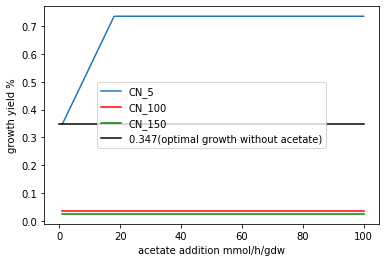

In [7]:
import matplotlib
import matplotlib.pyplot as plt
ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, CN_5_a[0], label = "CN_5")
plt.plot(ace_x, CN_100_a[0], color = "red", label = "CN_100")
plt.plot(ace_x, CN_150_a[0], color = "green", label = "CN_150")
x_coordinates = [0, 100]
y_coordinates = [0.347, 0.347]
plt.plot(x_coordinates, y_coordinates, color = "black", label = "0.347(optimal growth without acetate)")
plt.xlabel("acetate addition mmol/h/gdw")
plt.ylabel("growth yield %")
plt.legend()

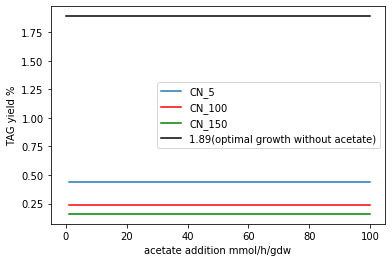

In [9]:
ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, CN_5_a[1], label = "CN_5")
plt.plot(ace_x, CN_100_a[1], color = "red", label = "CN_100")
plt.plot(ace_x, CN_150_a[1], color = "green", label = "CN_150")
x_coordinates = [0, 100]
y_coordinates = [growth2, growth2]
plt.plot(x_coordinates, y_coordinates, color = "black", label = "1.89(optimal growth without acetate)")
plt.xlabel("acetate addition mmol/h/gdw")
plt.ylabel("TAG yield %")
plt.legend()

In [11]:
# Comparison with YPD and YPA

CN_5_d = np.zeros((2,100))
CN_5_oa = np.zeros((2,100))

YNBWAAAS_a = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPA.xlsx", 'rest of ynbwaaas 103', header = None)
YNBWAAAS_a = YNBWAAAS_a.to_numpy()
media_without_ynb_a = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPA.xlsx", 'media without ynb', header = None)
media_without_ynb_a = media_without_ynb_a.to_numpy()

test_medium_a = []

In [19]:
test = 0
with iRhto1108N_model:
    medium = test_medium[0]
    medium["EX_glc__D_e"] = 0
#     for k in range(100):
#         medium["EX_glc__D_e"] = k*100/100
#         iRhto1108N_model.medium = medium
#         CN_5_d[0][k] = iRhto1108N_model.slim_optimize()
    iRhto1108N_model.medium = medium
    test = iRhto1108N_model.slim_optimize()

with iRhto1108N_model:
    medium = iRhto1108N_model.medium
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS_a[i][0]] = YNBWAAAS_a[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb_a[j][0]] = media_without_ynb_a[j][1]
    test_medium_a.append(medium.copy())
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model.medium = medium
        CN_5_oa[0][k] = iRhto1108N_model.slim_optimize()


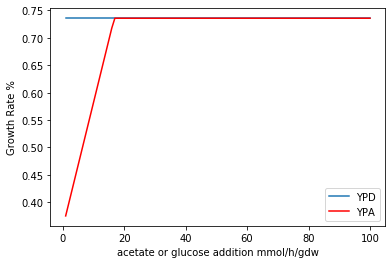

In [17]:
ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, CN_5_d[0], label = "YPD")
plt.plot(ace_x, CN_5_oa[0], color = "red", label = "YPA")
#plt.plot(ace_x, CN_150_a[1], color = "green", label = "CN_150")
# x_coordinates = [0, 100]
# y_coordinates = [growth2, growth2]
# plt.plot(x_coordinates, y_coordinates, color = "black", label = "1.89(optimal growth without acetate)")
plt.xlabel("acetate or glucose addition mmol/h/gdw")
plt.ylabel("Growth Rate %")
plt.legend()

In [20]:
print(test)

0.735527869770321
